In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

from numpy.random import permutation
# there is a permutation function we need from numpy.random

import matplotlib.colors as pltco # A package to help with coloring plots

In [2]:
auto_url = 'https://drive.google.com/uc?export=download&id=1GI8Wa7rIve-qOw2wCeH9DdFo0RMao1Nt'

auto_data = pd.read_csv(auto_url, delim_whitespace=True, names=['mpg', 'cylinders', 
                                                                'displacement', 'horsepower',
                                                                'weight', 'acceleration', 
                                                                'model year', 'origin', 
                                                                'car name'])
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [4]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 1 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 10, X_train[:, 0].max() + 10
    y_min, y_max = X_train[:, 1].min() - 10, X_train[:, 1].max() + 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
      
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

In [5]:
# the functions in scikit-learn all work with numpy arrays 

# X is our input features
X = np.array(auto_data.loc[:, ['displacement', 'weight']])


# y is our output feature
y = np.array(auto_data.loc[:, 'mpg'])

# Note that these need to be numpy.arrays and so we have to recode string variables to
# be represented by numerical values.


In [6]:
# Make the training and testing sets

# we will choose the size of our testing set to be 20% of the data we have
n = X.shape[0]
test = int(0.20*n)

# choose a random shuffling of the data and apply it to both the inputs and the output.
perm = permutation(n)
X = X[perm]
y = y[perm]

# Build the testing and training sets
X_test = X[:test]
y_test = y[:test]

X_train = X[test:]
y_train = y[test:]

In [7]:
from sklearn.neighbors import KNeighborsRegressor

Training R2: 0.7092126624064233
Testing R2: 0.7552185012494546


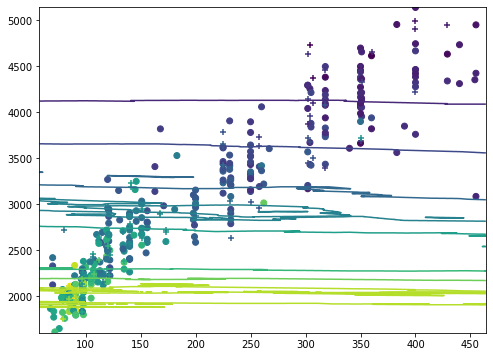

In [8]:
reg = KNeighborsRegressor(n_neighbors = 30)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

In [9]:
from sklearn.tree import DecisionTreeRegressor

Training R2: 0.7404202282768986
Testing R2: 0.7748510272898417


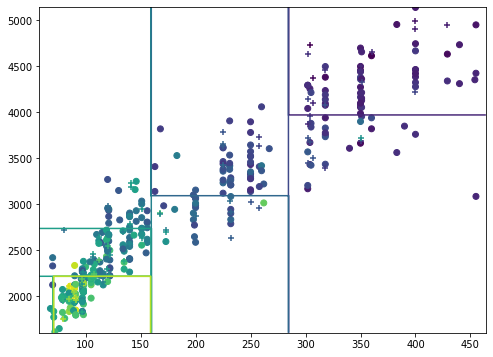

In [10]:
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

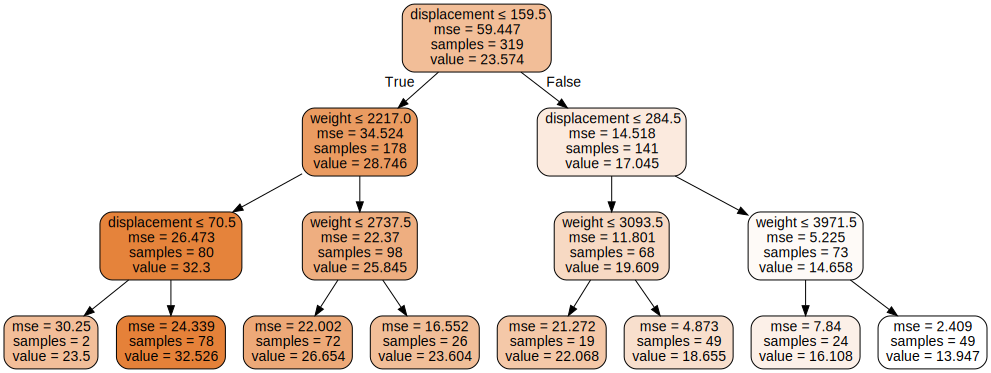

In [11]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(reg, out_file=None, 
                      feature_names=['displacement', 'weight'],    
                      filled=True, rounded=True,  
                      special_characters=True)
graphviz.Source(dot_data)

In [12]:
from sklearn.neural_network import MLPRegressor

Training R2: -0.3632810654121894
Testing R2: -0.48529804560989387


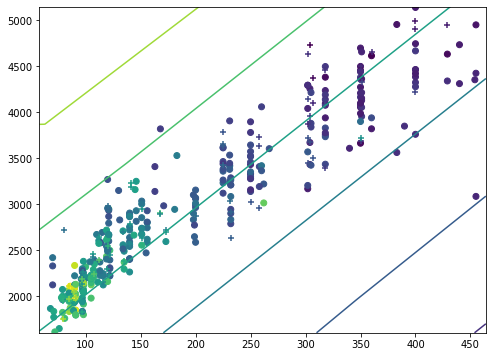

In [14]:
reg = MLPRegressor( hidden_layer_sizes=(100,100) )
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train,X_test, y_test)